In [18]:
import math
import pandas as pd
import numpy as np
import random
from scipy.interpolate import UnivariateSpline
from scipy.stats import rankdata
from scipy.special import logit as logit
from matplotlib import pyplot as plt

from  import algorithms, viz
# import community as community_louvain
import networkx as nx
from networkx.algorithms import community
from networkx.algorithms.community import k_clique_communities,label_propagation_communities, asyn_lpa_communities,greedy_modularity_communities
from networkx.algorithms.centrality import *
from networkx.algorithms.cluster import *
from networkx.algorithms.assortativity import *
# import igraph as ig

from scipy.interpolate import UnivariateSpline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from sklearn.utils import shuffle
from xgboost import XGBClassifier
import seaborn as sns
# from Powerset import *

clinical_231_file = 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\clinical_231_data.csv'
mRNA_231_file = 'C:\\Users\\bird\\Desktop\\cancer_project_github\\cancer_data\\data_mRNA_231_sort_with_sensitive.csv'
id_symbol_lookup_file = 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\Hugo_Symbol_to_id.csv'
filterd_data = 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\filtered_559_genes_data.csv'
filterd_133_data = 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\filtered_133_genes_data.csv'

  Created wheel for karateclub: filename=karateclub-1.0.23-py3-none-any.whl size=94184 sha256=12de5f2fbda28fd570c00821a70ca7ef6271b4d99ed961fd905c69da1a52adec
  Stored in directory: c:\users\bird\appdata\local\pip\cache\wheels\00\a6\1f\3c005f37b3cc791f98cd02ad54a02844484a1b946d9c8dd871
  Created wheel for python-louvain: filename=python_louvain-0.14-py3-none-any.whl size=9295 sha256=6e7d94c1e179f741217e1318bce07e2ce4e8b0d114c7880b47f6cdae79a92da2
  Stored in directory: c:\users\bird\appdata\local\pip\cache\wheels\22\f9\ce\591ffa9b16851da50ca337c9ecfd44d79a7b87fcbd2a7a0021
Successfully built karateclub python-louvain
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21


In [17]:
!pip install cdlib

  Using cached karateclub-1.0.23.tar.gz (59 kB)
  Using cached chinese_whispers-0.7.4-py3-none-any.whl (7.5 kB)
  Using cached PuLP-2.4-py3-none-any.whl (40.6 MB)
  Using cached shuffle_graph-1.1.1-py3-none-any.whl (16 kB)
  Using cached python-louvain-0.14.tar.gz (19 kB)
  Using cached omega_index_py3-0.3-py3-none-any.whl (2.5 kB)
  Using cached markov_clustering-0.0.6.dev0-py3-none-any.whl (6.3 kB)
  Using cached ASLPAw-2.0.0-py3-none-any.whl (17 kB)
  Using cached nf1-0.0.3-py3-none-any.whl (7.9 kB)
  Using cached bimlpa-0.1.2-py3-none-any.whl (7.0 kB)
  Using cached pquality-0.0.7-py3-none-any.whl (3.5 kB)
  Using cached eva_lcd-0.1.0-py3-none-any.whl (8.9 kB)
  Using cached demon-2.0.5-py3-none-any.whl (5.4 kB)
  Using cached PyGSP-0.5.1-py2.py3-none-any.whl (1.8 MB)
  Using cached amply-0.1.4-py3-none-any.whl (16 kB)
  Using cached multivalued_dict-2.0.1-py3-none-any.whl (21 kB)
  Using cached count_dict-1.1.1-py3-none-any.whl (15 kB)


In [81]:
arr = [[11, 12, 13],
                [14, 15, 16],
                [17, 15, 11],
                [12, 14, 15]]

result = arr.index([14, 15, 16])
result
# arr[1,1]

1

In [2]:
# mRNA_231_file = pd.read_csv(mRNA_231_file).drop(columns = ['Hugo_ID'])
# mRNA_231_file
# arrs_all = np.array(mRNA_231_file).tolist()

df = pd.read_csv(filterd_data).drop(columns = ['ID'])
arrs_559 = np.array(df).tolist()

# arrs_all.index(arrs_559[100])

In [97]:
len(arrs_559[0])

231

In [81]:
def const_net(correlation, threshold):
    correlations = np.copy(correlation)
    for i in range(correlations.shape[0]):
        correlations[i][i]=0
    for i in range(correlations.shape[0]):
        for j in range(correlations.shape[0]):
            if correlations[i][j] < threshold and correlations[i][j]>-threshold:
                correlations[i][j]  = 0
            else:
                correlations[i][j]  = 1

    G = nx.Graph()
    G.add_nodes_from(np.arange(correlations.shape[0]))
    edge_list = []
    for i in range(correlations.shape[0]):
         for j in range(i+1, correlations.shape[0]):
                if correlations[i][j] == 1:
                    edge_list.append((i,j))

#     print(len(edge_list))
    G.add_edges_from(edge_list)
    G.remove_nodes_from(list(nx.isolates(G)))
    
    print("Node NO", G.number_of_nodes())
    print("avg. degree",G.number_of_edges()*2 / G.number_of_nodes())
    return G

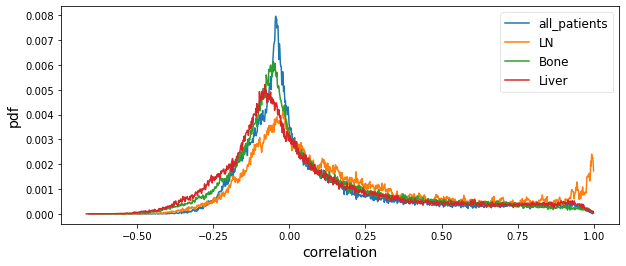

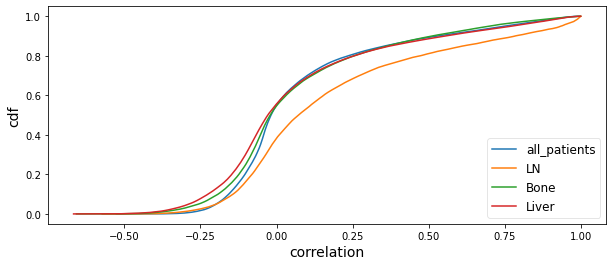

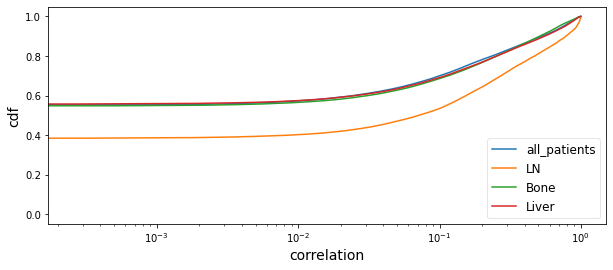

In [6]:
df = pd.read_csv(filterd_data).drop(columns = ['ID'])

LN_df = df.drop(columns = map(str,  list(range(117, 231))))
Bone_df = df.drop(columns = map(str,  list(range(117)))).drop(columns = map(str,  list(range(191,231))))
Liver_df = df.drop(columns = map(str,  list(range(191))))
correlations = np.corrcoef(df, df)[:559, :559]
LN_correlations = np.corrcoef(LN_df, LN_df)[:559, :559]
Bone_correlations = np.corrcoef(Bone_df, Bone_df)[:559, :559]
Liver_correlations = np.corrcoef(Liver_df, Liver_df)[:559, :559]

correlations_l = [correlations,LN_correlations, Bone_correlations, Liver_correlations ]
label_l = ['all_patients', 'LN', 'Bone', 'Liver']
plt.figure(figsize=(10,4))

plt.xlabel('correlation', fontsize=14)
plt.ylabel('pdf', fontsize=14)

for w in range(len(correlations_l)):
    correlations = correlations_l[w]
    for i in range(correlations.shape[0]):
        correlations[i][i]=0
    correlations = correlations[~np.eye(correlations.shape[0],dtype=bool)].reshape(correlations.shape[0],-1)       
    correlations = correlations.flatten()

    n = 1000
    s = np.asarray(correlations)   # generate your data sample with N elements
    p, x = np.histogram(s, bins=n) # bin it into n = N//10 bins
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    f = UnivariateSpline(x, p, s=n)
    y = f(x)/len(correlations)

    cdfy = np.cumsum(y)

    plt.plot(x, y, label = label_l[w])
plt.legend(loc='upper right', markerscale=5, fontsize=12, framealpha=0.5)
plt.show()

#---------------------
plt.figure(figsize=(10,4))
plt.xlabel('correlation', fontsize=14)
plt.ylabel('cdf', fontsize=14)

for w in range(len(correlations_l)):
    correlations = correlations_l[w]
    for i in range(correlations.shape[0]):
        correlations[i][i]=0
    correlations = correlations[~np.eye(correlations.shape[0],dtype=bool)].reshape(correlations.shape[0],-1)       
    correlations = correlations.flatten()

    n = 1000
    s = np.asarray(correlations)   # generate your data sample with N elements
    p, x = np.histogram(s, bins=n) # bin it into n = N//10 bins
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    f = UnivariateSpline(x, p, s=n)
    y = f(x)/len(correlations)

    cdfy = np.cumsum(y)

    plt.plot(x, cdfy, label = label_l[w])
plt.legend(loc='lower right', markerscale=5, fontsize=12, framealpha=0.5)
plt.show()


#---------------------
plt.figure(figsize=(10,4))
plt.xlabel('correlation', fontsize=14)
plt.ylabel('cdf', fontsize=14)
plt.xscale('log')
for w in range(len(correlations_l)):
    correlations = correlations_l[w]
    for i in range(correlations.shape[0]):
        correlations[i][i]=0
    correlations = correlations[~np.eye(correlations.shape[0],dtype=bool)].reshape(correlations.shape[0],-1)       
    correlations = correlations.flatten()

    n = 1000
    s = np.asarray(correlations)   # generate your data sample with N elements
    p, x = np.histogram(s, bins=n) # bin it into n = N//10 bins
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    f = UnivariateSpline(x, p, s=n)
    y = f(x)/len(correlations)

    cdfy = np.cumsum(y)

    plt.plot(x, cdfy, label = label_l[w])
plt.legend(loc='lower right', markerscale=5, fontsize=12, framealpha=0.5)
plt.show()


In [51]:
# df = pd.read_csv(filterd_data).drop(columns = ['ID'])
# correlations = np.corrcoef(df, df)[:559, :559]

def plot_correlation_distribution(correlations):
    for i in range(correlations.shape[0]):
        correlations[i][i]=0
#     for i in range(correlations.shape[0]):
#         for j in range(correlations.shape[0]):
#             if correlations[i][j] < 0 :
#                 correlations[i][j]  = -correlations[i][j]
    correlations = correlations[~np.eye(correlations.shape[0],dtype=bool)].reshape(correlations.shape[0],-1)       
    correlations = correlations.flatten()
    print(len(correlations))

    n = 1000
    s = np.asarray(correlations)   # generate your data sample with N elements
    p, x = np.histogram(s, bins=n) # bin it into n = N//10 bins
    x = x[:-1] + (x[1] - x[0])/2   # convert bin edges to centers
    f = UnivariateSpline(x, p, s=n)
    y = f(x)/len(correlations)

    cdfy = np.cumsum(y)

    plt.figure(figsize=(10,4))
    plt.xlabel('correlation', fontsize=14)
    plt.ylabel('pdf', fontsize=14)
    plt.plot(x, y)
    plt.show()

    plt.figure(figsize=(10,4))
    # plt.xscale('log')
    plt.xlabel('correlation', fontsize=14)
    plt.ylabel('cdf', fontsize=14)
    plt.plot(x, cdfy)
    plt.show()
    

    plt.figure(figsize=(10,4))
    plt.xscale('log')
    # plt.yscale('log')
    plt.xlabel('correlation', fontsize=14)
    plt.ylabel('cdf', fontsize=14)
    plt.plot(x, cdfy)
    plt.show()

# plot_correlation_distribution(correlations)

In [15]:

print(cdfy[850]) #media 0.225 avg. degree: 229
print(cdfy[650]) # 0.65 -> avg. degree: 17.5

0.9718106046935803
0.9260328758753759


In [17]:
df = pd.read_csv(filterd_data).drop(columns = ['ID'])
correlations = np.corrcoef(df, df)[:559, :559]

coms = []
modularities = []
for thre in np.arange(0.4, 0.87, 0.02):
    print(thre)
    G = const_net(correlations, thre)
    print(G.number_of_nodes())
    com = algorithms.greedy_modularity(G)
#     viz.plot_network_clusters(G, com, node_size = 100)
    coms.append(com)
    m = com.newman_girvan_modularity()
    print(m)
    modularities.append(m.score)
print(modularities)



0.4
21287
539
FitnessResult(min=None, max=None, score=0.47370139694084, std=None)
0.42000000000000004
20278
537
FitnessResult(min=None, max=None, score=0.4999808668483326, std=None)
0.44000000000000006
19296
531
FitnessResult(min=None, max=None, score=0.4726604800546398, std=None)
0.4600000000000001
18333
529
FitnessResult(min=None, max=None, score=0.4696772785226315, std=None)
0.4800000000000001
17487
513
FitnessResult(min=None, max=None, score=0.475327188703887, std=None)
0.5000000000000001
16704
502
FitnessResult(min=None, max=None, score=0.5126696569655239, std=None)
0.5200000000000001
15929
493
FitnessResult(min=None, max=None, score=0.5080584341398409, std=None)
0.5400000000000001
15226
482
FitnessResult(min=None, max=None, score=0.5049730498598042, std=None)
0.5600000000000002
14508
472
FitnessResult(min=None, max=None, score=0.5012371149116058, std=None)
0.5800000000000002
13822
459
FitnessResult(min=None, max=None, score=0.49634344952331383, std=None)
0.6000000000000002
13133


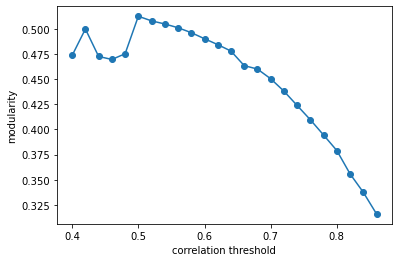

0.5126696569655239


In [20]:
plt.xlabel('correlation threshold')
plt.ylabel('modularity')
# modularities = [n.score for n in modularities]

x_val =  np.arange(0.4, 0.87, 0.02)
x_val,modularities
plt.plot(x_val, modularities)
plt.scatter( x_val, modularities)
plt.show()

print(modularities[5])

(4803, 4803)
0.7
Node NO 2622
avg. degree 81.23646071700992
2622


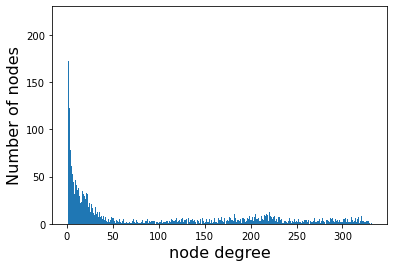

0.38746110404251655 [-0.59153612] 1.8357080729054098


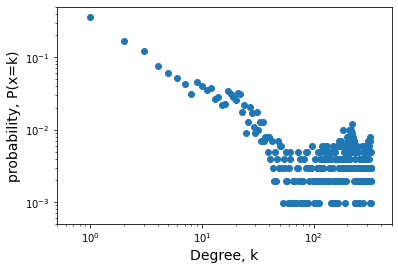

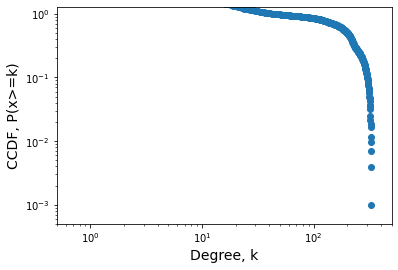

In [86]:
# threshod: 0.5 (max modularity) or 0.85 (avrage node degree = 17.5)

def plot_degree_dist(G, bins):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees,bins=bins)
    plt.xlabel('node degree',fontsize = 16)
    plt.ylabel('Number of nodes',fontsize = 16)
#     plt.ylim(0, 230)
    plt.show()
    max_deg = bins
    new_degree = []
    for i in range(max_deg):
        a = degrees.count(i)
        new_degree.append(a)
    # print(len(new_degree))



    zp = zip(range(max_deg), new_degree)
    l=list(filter(lambda s:s[1]!=0 ,zp))
    # print(len(l))

    arr = np.array(l)

    l=list(filter(lambda s:s[0]!=0 ,l))
    arr = np.array(l)

    x = arr[:,0].reshape((-1, 1))
    y = arr[:,1]
    x = np.log10(x)

    y = np.log10(y)

    reg = LinearRegression().fit(x, y)
    print(reg.score(x, y), reg.coef_,reg.intercept_)

    cdf = []
    for i in range(len(arr[:,0])):
        a = sum(arr[:,1][i:])
        cdf.append(a)
    # print(cdf)

    plt.xlabel('Degree, k', fontsize=14)
    plt.ylabel('probability, P(x=k)', fontsize=14)
    plt.scatter(arr[:,0], np.divide(arr[:,1],1015))
    plt.yscale('log')#///
    plt.xscale('log')#///
    plt.xlim(0.5, 500)
    plt.ylim(0.0005, 0.5)
    plt.show()

    plt.xlabel('Degree, k', fontsize=14)
    plt.ylabel('CCDF, P(x>=k)', fontsize=14)
    plt.scatter(arr[:,0], np.divide(cdf,1015))
    plt.yscale('log')#///
    plt.xscale('log')#///
    plt.xlim(0.5, 500)
    plt.ylim(0.0005, 1.300)
    plt.show()

# filterd_4803_data = 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\union_genes_4803.csv'
# df = pd.read_csv(filterd_4803_data).drop(columns = ['ID'])
# correlations = np.corrcoef(df, df)[:4803, :4803]
# print(correlations.shape)
# for thre in [0.7]:
#     print(thre)
#     G = const_net(correlations, thre)
#     print(G.number_of_nodes())
#     degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
#     dmax = max(degree_sequence)
#     plot_degree_dist(G, dmax)

    

## Code for gene network with 231 patients

In [5]:
#code for gephi export network 
df = pd.read_csv(filterd_data).drop(columns = ['ID'])
correlations = np.corrcoef(df, df)[:559, :559]
threshold = 0.5
link_num = 0
cores = np.copy(correlations)

for i in range(cores.shape[0]):
    cores[i][i]=0
    
for i in range(cores.shape[0]):
    for j in range(cores.shape[0]):
        if cores[i][j] < threshold and cores[i][j]>-threshold:
            cores[i][j]  = 0
        else:
            link_num +=1
            cores[i][j]  = 1


print("Number of links: ", link_num/2)
print("Avg. Node Degree: ", link_num/231/2)

temp_df = pd.DataFrame(cores)
temp_df
temp_df.to_csv("C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\gene_net_matrix.csv")

Number of links:  16704.0
Avg. Node Degree:  72.31168831168831


In [8]:
#code for gephi, analysis gephi community detection result
com_pd = pd.read_csv("C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\559_gene_com.csv")
nodes = list(com_pd['Id'])
com_index = list(com_pd['modularity_class'])



gene_taken_off_sequence = [41, 88, 95, 34, 81, 82, 65, 62, 100, 104, 115, 29, 113, 91, 37, 56, 116, 17, 18, 60, 102, 78, 122, 121, 73, 105, 50, 98, 45, 119, 92, 84, 14, 15, 130, 101, 128, 126, 125, 127, 51, 103, 124, 26, 59, 42, 77, 8, 6, 35, 111, 90, 19, 38, 97, 58, 112, 23, 55, 47, 72, 114, 89, 54, 106, 1, 117, 20, 25, 131, 9, 3, 108, 79, 43, 110, 86, 39, 5, 24, 52, 30, 109, 53, 10, 87, 27, 132, 67, 44, 94, 75, 49, 13, 76, 74, 40, 46, 63, 68, 123, 12, 31, 33, 71, 118, 93, 4, 80, 96, 83, 85, 129, 0, 16, 107, 99, 61, 70, 57, 64, 69, 7, 28, 2, 66, 36, 120, 21, 22,11,32,48]

sensitive_id_559_ref_list = list(pd.read_csv(filterd_data)['ID'])
sensitive_id_133_ref_list = list(pd.read_csv(filterd_133_data)['ID'])
top_34_gene_id_ref_list = [sensitive_id_133_ref_list[i] for i in gene_taken_off_sequence[-34:]]
top_13_gene_id_ref_list = [sensitive_id_133_ref_list[i] for i in gene_taken_off_sequence[-13:]]

com_size = max(com_index)+1
conmmunities = []
for i in range(com_size):
    conmmunities.append([])
for i in range(len(nodes)):
    n = nodes[i]
    c = com_index[i]
    conmmunities[c].append(sensitive_id_559_ref_list[n])

com_table = np.zeros((com_size,4))

for i in range(com_size):
    com_table[i][0] = len(conmmunities[i])
    com_table[i][1] = len(list(set(conmmunities[i]) & set(sensitive_id_133_ref_list)))
    com_table[i][2] = len(list(set(conmmunities[i]) & set(top_34_gene_id_ref_list)))
    com_table[i][3] = len(list(set(conmmunities[i]) & set(top_13_gene_id_ref_list)))


print("com_size",com_size)
print('Community overlapping table')
# corres_df.sort_values(by=['all_corre'])
print(pd.DataFrame(com_table).sort_values(by=[0],ascending = False))
print(np.sum(com_table,axis = 0))

com_size 11
Community overlapping table
        0     1     2    3
1   154.0  18.0   4.0  3.0
0   130.0  47.0  10.0  3.0
8    70.0  18.0   6.0  2.0
6    60.0   8.0   1.0  0.0
3    51.0  28.0   7.0  4.0
7    27.0   7.0   4.0  1.0
2     2.0   0.0   0.0  0.0
4     2.0   0.0   0.0  0.0
5     2.0   0.0   0.0  0.0
9     2.0   0.0   0.0  0.0
10    2.0   0.0   0.0  0.0
[502. 126.  32.  13.]


In [9]:
# len(nodes_133)
# nodes_492.index(5637)
com_pd = pd.read_csv("C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\492_gene_all.csv")
nodes = list(com_pd['Id'])

print(nodes)
gene_taken_off_sequence = [41, 88, 95, 34, 81, 82, 65, 62, 100, 104, 115, 29, 113, 91, 37, 56, 116, 17, 18, 60, 102, 78, 122, 121, 73, 105, 50, 98, 45, 119, 92, 84, 14, 15, 130, 101, 128, 126, 125, 127, 51, 103, 124, 26, 59, 42, 77, 8, 6, 35, 111, 90, 19, 38, 97, 58, 112, 23, 55, 47, 72, 114, 89, 54, 106, 1, 117, 20, 25, 131, 9, 3, 108, 79, 43, 110, 86, 39, 5, 24, 52, 30, 109, 53, 10, 87, 27, 132, 67, 44, 94, 75, 49, 13, 76, 74, 40, 46, 63, 68, 123, 12, 31, 33, 71, 118, 93, 4, 80, 96, 83, 85, 129, 0, 16, 107, 99, 61, 70, 57, 64, 69, 7, 28, 2, 66, 36, 120, 21, 22,11,32,48]

sensitive_id_559_ref_list = list(pd.read_csv(filterd_data)['ID'])
sensitive_id_133_ref_list = list(pd.read_csv(filterd_133_data)['ID'])
top_34_gene_id_ref_list = [sensitive_id_133_ref_list[i] for i in gene_taken_off_sequence[-34:]]
top_13_gene_id_ref_list = [sensitive_id_133_ref_list[i] for i in gene_taken_off_sequence[-13:]]

com_size = max(com_index)+1
nodes_492 = []
    
for i in range(len(nodes)):
    n = nodes[i]
    nodes_492.append(sensitive_id_559_ref_list[n])

print(n)
nodes_133 = list(set(nodes_492) & set(sensitive_id_133_ref_list))
nodes_34 = list(set(nodes_492) & set(top_34_gene_id_ref_list))
nodes_13 = list(set(nodes_492) & set(top_13_gene_id_ref_list))

# ref_table
l1 = []
for item in nodes_133:
    l1.append(nodes_492.index(item))
l1 = sorted(l1)
l2 = []    
for item in nodes_34:
    l2.append(nodes_492.index(item))   
l2 = sorted(l2)
l3 = []    
for item in nodes_13:
    l3.append(nodes_492.index(item))
l3 = sorted(l3)
ref_table = np.array([l1,l2,l3])
ref_table

[0, 1, 9, 12, 13, 16, 18, 21, 22, 36, 50, 56, 71, 76, 89, 93, 94, 95, 96, 97, 99, 100, 103, 104, 105, 106, 108, 112, 114, 115, 118, 126, 131, 133, 134, 138, 141, 142, 148, 150, 154, 155, 158, 159, 168, 174, 177, 187, 193, 197, 199, 206, 217, 222, 226, 233, 237, 246, 248, 249, 253, 255, 257, 260, 265, 267, 285, 287, 292, 297, 298, 316, 327, 332, 346, 347, 357, 359, 368, 383, 388, 389, 398, 404, 428, 429, 439, 442, 455, 466, 468, 471, 501, 504, 511, 533, 548, 553, 31, 494, 2, 3, 4, 5, 6, 7, 8, 10, 11, 14, 15, 17, 19, 24, 28, 32, 34, 37, 38, 41, 43, 45, 46, 48, 51, 53, 54, 57, 59, 62, 65, 68, 70, 73, 74, 75, 77, 82, 84, 85, 86, 90, 92, 98, 109, 110, 111, 117, 120, 124, 125, 128, 130, 135, 143, 145, 153, 156, 162, 166, 171, 172, 175, 176, 179, 180, 184, 185, 188, 189, 190, 192, 203, 205, 211, 214, 215, 216, 221, 224, 232, 238, 244, 245, 247, 251, 261, 270, 272, 275, 276, 279, 281, 283, 284, 289, 294, 296, 302, 303, 304, 315, 317, 322, 324, 339, 340, 341, 355, 358, 360, 367, 369, 374, 377, 

<ipython-input-9-133b7ba4b40c>:39: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  ref_table = np.array([l1,l2,l3])


array([list([0, 1, 6, 7, 9, 11, 16, 18, 25, 28, 29, 36, 38, 43, 46, 53, 54, 55, 56, 57, 62, 65, 66, 72, 74, 76, 78, 79, 82, 84, 85, 86, 87, 95, 98, 99, 117, 118, 122, 144, 150, 155, 160, 164, 167, 182, 201, 206, 213, 231, 235, 238, 242, 243, 247, 254, 257, 260, 261, 262, 263, 267, 273, 274, 277, 278, 280, 281, 285, 287, 288, 289, 290, 291, 292, 293, 294, 295, 299, 300, 302, 305, 307, 309, 310, 314, 317, 320, 323, 327, 328, 331, 333, 339, 340, 348, 353, 369, 370, 374, 377, 378, 380, 381, 389, 390, 396, 397, 409, 415, 416, 417, 421, 424, 428, 433, 438, 442, 453, 457, 464, 467, 473, 482, 491, 495]),
       list([0, 6, 11, 38, 72, 85, 122, 144, 155, 206, 247, 257, 261, 273, 274, 278, 288, 291, 292, 294, 309, 314, 317, 323, 327, 331, 339, 348, 415, 428, 438, 482]),
       list([6, 122, 144, 155, 257, 261, 273, 274, 288, 292, 294, 314, 327])],
      dtype=object)

In [163]:
np.setdiff1d(l1,l2)

array([  1,   7,   9,  16,  18,  25,  28,  29,  36,  43,  46,  53,  54,
        55,  56,  57,  62,  65,  66,  74,  76,  78,  79,  82,  84,  86,
        87,  95,  98,  99, 117, 118, 150, 160, 164, 167, 182, 201, 213,
       231, 235, 238, 242, 243, 254, 260, 262, 263, 267, 277, 280, 281,
       285, 287, 289, 290, 293, 295, 299, 300, 302, 305, 307, 310, 320,
       328, 333, 340, 353, 369, 370, 374, 377, 378, 380, 381, 389, 390,
       396, 397, 409, 416, 417, 421, 424, 433, 442, 453, 457, 464, 467,
       473, 491, 495])

## Keep only giant component

In [10]:
com_size = max(com_index)+1
cms = []
for i in range(com_size):
    cms.append([])
for i in range(len(nodes)):
    n = nodes[i]
    c = com_index[i]
    cms[c].append(n)
# cms[2]

giant_comp_nodes = []
remove_nodes = []
for i in cms:
    if len(i)>2:
        giant_comp_nodes.append(i)
    else:
        remove_nodes.append(i)
        
giant_comp_nodes =sorted([item for sublist in giant_comp_nodes for item in sublist]) 
remove_nodes =  [item for sublist in remove_nodes for item in sublist]

len(set(range(559)) - set(giant_comp_nodes))

67

# gene network community analysis for each cancer type 

## For diff cancer types, need to change the code manually. 
 LN: threshold 0.24, modularity: 0.19
 
 Bone: threshold 0.62, modularity: 0.54
 
 Liver: threshold 0.54, modularity: 0.33

In [11]:
# plot degree distribution

df = pd.read_csv(filterd_data).drop(columns = ['ID']).T
giant_comp_nodes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 148, 149, 150, 151, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 199, 200, 201, 203, 205, 206, 207, 210, 211, 212, 213, 214, 215, 216, 217, 219, 221, 222, 223, 224, 226, 228, 231, 232, 233, 235, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 267, 270, 272, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 291, 292, 293, 294, 295, 296, 297, 298, 300, 301, 302, 303, 304, 305, 306, 308, 309, 310, 311, 312, 314, 315, 316, 317, 318, 320, 321, 322, 323, 324, 325, 326, 327, 329, 330, 331, 332, 333, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 349, 350, 351, 352, 353, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 446, 447, 448, 450, 451, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 482, 483, 484, 485, 486, 487, 488, 490, 491, 492, 493, 494, 495, 496, 498, 500, 501, 502, 503, 504, 506, 507, 508, 509, 511, 512, 514, 515, 516, 519, 520, 521, 522, 524, 525, 526, 528, 529, 530, 531, 532, 533, 534, 535, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 548, 549, 551, 552, 553, 554, 555, 556, 557, 558]

df = df.drop(columns =  list(set(range(559)) - set(giant_comp_nodes))).T

LN_df = df.drop(columns = map(str,  list(range(117, 231))))
correlations = np.corrcoef(LN_df, LN_df)[:492, :492]

# Bone_df = df.drop(columns = map(str,  list(range(117)))).drop(columns = map(str,  list(range(191,231))))
# correlations = np.corrcoef(Bone_df, Bone_df)[:492, :492]

# Liver_df = df.drop(columns = map(str,  list(range(191))))
# correlations = np.corrcoef(Liver_df, Liver_df)[:492, :492]

# for thre in [0.56]:
#     print(thre)
#     G = const_net(correlations, thre)
#     print(G.number_of_nodes())
#     degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
#     dmax = max(degree_sequence)
#     plot_degree_dist(G, dmax)

0.2
Node NO 492
avg. degree 231.5040650406504
FitnessResult(min=None, max=None, score=0.18808099830342684, std=None)
0.22
Node NO 492
avg. degree 217.9308943089431
FitnessResult(min=None, max=None, score=0.19298938066336002, std=None)
0.24
Node NO 492
avg. degree 205.1910569105691
FitnessResult(min=None, max=None, score=0.19340339781697125, std=None)
0.26
Node NO 492
avg. degree 194.6991869918699
FitnessResult(min=None, max=None, score=0.1843136013280151, std=None)
0.27999999999999997
Node NO 492
avg. degree 184.20731707317074
FitnessResult(min=None, max=None, score=0.179069757860704, std=None)
0.29999999999999993
Node NO 492
avg. degree 175.04471544715446
FitnessResult(min=None, max=None, score=0.1809426757357458, std=None)
0.31999999999999995
Node NO 491
avg. degree 166.5173116089613
FitnessResult(min=None, max=None, score=0.16884896423736506, std=None)
0.33999999999999997
Node NO 488
avg. degree 159.5860655737705
FitnessResult(min=None, max=None, score=0.16640966632610865, std=None)

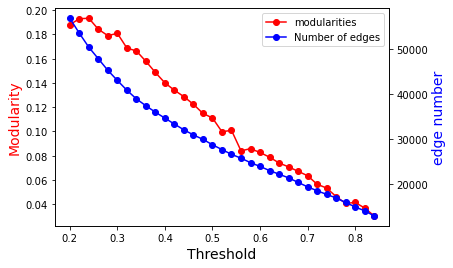

In [20]:
df = pd.read_csv(filterd_data).drop(columns = ['ID']).T

df = df.drop(columns =  list(set(range(559)) - set(giant_comp_nodes))).T

LN_df = df.drop(columns = map(str,  list(range(117, 231))))
correlations = np.corrcoef(LN_df, LN_df)[:492, :492]

# Bone_df = df.drop(columns = map(str,  list(range(117)))).drop(columns = map(str,  list(range(191,231))))
# correlations = np.corrcoef(Bone_df, Bone_df)[:492, :492]

# Liver_df = df.drop(columns = map(str,  list(range(191))))
# correlations = np.corrcoef(Liver_df, Liver_df)[:492, :492]


coms = []
modularities = []
x_val =  np.arange(0.2, 0.85, 0.02)
link_num = []
for thre in x_val:
    print(thre)
    G = const_net(correlations, thre)
    link_num.append(G.number_of_edges())
#     print(G.number_of_nodes())
    com = algorithms.greedy_modularity(G)
#     viz.plot_network_clusters(G, com, node_size = 100)
    coms.append(com)
    m = com.newman_girvan_modularity()
    print(m)
    modularities.append(m.score)
print(modularities)


fig,ax = plt.subplots()

lns1 = ax.plot(x_val, modularities, color="red", marker="o", label='modularities')
ax.set_xlabel("Threshold",fontsize=14)
ax.set_ylabel("Modularity",color="red",fontsize=14)
ax2=ax.twinx()
lns2 = ax2.plot(x_val, link_num,color="blue",marker="o", label='Number of edges')
ax2.set_ylabel("edge number",color="blue",fontsize=14)
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
plt.show()

# print(modularities[5])

0.85
Node NO 261
avg. degree 93.88505747126437
FitnessResult(min=None, max=None, score=0.03089853126779677, std=None)
0.87
Node NO 247
avg. degree 92.97975708502024
FitnessResult(min=None, max=None, score=0.022665756221391404, std=None)
0.89
Node NO 228
avg. degree 91.17543859649123
FitnessResult(min=None, max=None, score=0.022866650654606798, std=None)
0.91
Node NO 205
avg. degree 93.38536585365854
FitnessResult(min=None, max=None, score=0.017494769664411595, std=None)
0.93
Node NO 181
avg. degree 90.7182320441989
FitnessResult(min=None, max=None, score=0.019771059920687322, std=None)
[0.03089853126779677, 0.022665756221391404, 0.022866650654606798, 0.017494769664411595, 0.019771059920687322]


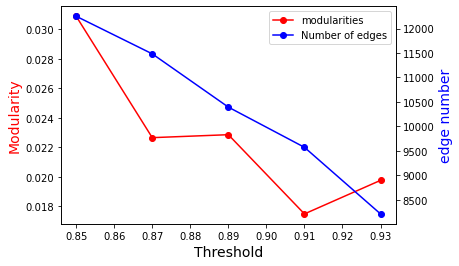

In [35]:
df = pd.read_csv(filterd_data).drop(columns = ['ID']).T

df = df.drop(columns =  list(set(range(559)) - set(giant_comp_nodes))).T

LN_df = df.drop(columns = map(str,  list(range(117, 231))))
correlations = np.corrcoef(LN_df, LN_df)[:492, :492]

# Bone_df = df.drop(columns = map(str,  list(range(117)))).drop(columns = map(str,  list(range(191,231))))
# correlations = np.corrcoef(Bone_df, Bone_df)[:492, :492]

# Liver_df = df.drop(columns = map(str,  list(range(191))))
# correlations = np.corrcoef(Liver_df, Liver_df)[:492, :492]


coms = []
modularities = []
x_val =  np.arange(0.2, 0.95, 0.02)
link_num = []
for thre in x_val:
    print(thre)
    G = const_net(correlations, thre)
    link_num.append(G.number_of_edges())
#     print(G.number_of_nodes())
    com = algorithms.greedy_modularity(G)
#     viz.plot_network_clusters(G, com, node_size = 100)
    coms.append(com)
    m = com.newman_girvan_modularity()
    print(m)
    modularities.append(m.score)
print(modularities)


fig,ax = plt.subplots()

lns1 = ax.plot(x_val, modularities, color="red", marker="o", label='modularities')
ax.set_xlabel("Threshold",fontsize=14)
ax.set_ylabel("Modularity",color="red",fontsize=14)
ax2=ax.twinx()
lns2 = ax2.plot(x_val, link_num,color="blue",marker="o", label='Number of edges')
ax2.set_ylabel("edge number",color="blue",fontsize=14)
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
plt.show()


node_num = [492,492,492,492,492,492,491,488,487,485,484,479,477,473,471, 460,451,443,432,424,408,403,395,375,368, 358, 355,342,325,313,298,290,270, 261,247,228,205,181]
avg_dgr = [231.5, 217.9,205.1,194.6,184.2,175.0,166.5,159.6,153.6,148.3, 143.1,139.1,134.2, \
           130.6,126.9,124.7,122.4,119.9,118.9,116.5,116.8,113.8,111.9,113.62, 110.2, 107.7,103.7,102.9,103.4,100.9,99.4,96.1,94.8,93.8,92.9,91.2,93.4,90.7]


In [30]:
len(node_num)

25

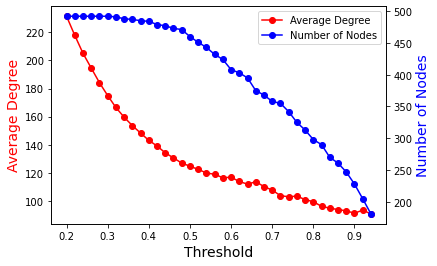

In [41]:

# print(modularities[5])

x_val =  np.arange(0.2, 0.95, 0.02)
node_num = [492,492,492,492,492,492,491,488,487,485,484,479,477,473,471, 460,451,443,432,424,408,403,395,375,368, 358, 355,342,325,313,298,290,270, 261,247,228,205,181]
avg_dgr = [231.5, 217.9,205.1,194.6,184.2,175.0,166.5,159.6,153.6,148.3, 143.1,139.1,134.2, \
           130.6,126.9,124.7,122.4,119.9,118.9,116.5,116.8,113.8,111.9,113.62, 110.2, 107.7,103.7,102.9,103.4,100.9,99.4,96.1,94.8,93.8,92.9,91.2,93.4,90.7]
fig,ax = plt.subplots()

lns1 = ax.plot(x_val, avg_dgr, color="red", marker="o", label='Average Degree')
ax.set_xlabel("Threshold",fontsize=14)
ax.set_ylabel("Average Degree",color="red",fontsize=14)
ax2=ax.twinx()
lns2 = ax2.plot(x_val, node_num,color="blue",marker="o", label='Number of Nodes')
ax2.set_ylabel("Number of Nodes",color="blue",fontsize=14)
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)
plt.show()



In [44]:
avg_dgr[node_num.index(432)]

118.9

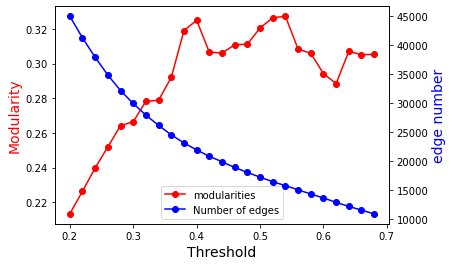

In [192]:
fig,ax = plt.subplots()

lns1 = ax.plot(x_val, modularities, color="red", marker="o", label='modularities')
ax.set_xlabel("Threshold",fontsize=14)
ax.set_ylabel("Modularity",color="red",fontsize=14)
ax2=ax.twinx()
lns2 = ax2.plot(x_val, link_num,color="blue",marker="o", label='Number of edges')
ax2.set_ylabel("edge number",color="blue",fontsize=14)
lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc = 'lower center')
plt.show()

In [197]:
# code for preparaing gephi import data
# LN: threshold 0.24, modularity: 0.19
# Bone: threshold 0.62, modularity: 0.54
# Liver: threshold 0.54, modularity: 0.33

threshold = 0.56
link_num = 0
cores = np.copy(correlations)

for i in range(cores.shape[0]):
    cores[i][i]=0
    
for i in range(cores.shape[0]):
    for j in range(cores.shape[0]):
        if cores[i][j] < threshold and cores[i][j]>-threshold:
            cores[i][j]  = 0
        else:
            link_num +=1
            cores[i][j]  = 1


# print("Number of links: ", link_num/2)
# print("Avg. Node Degree: ", link_num/231/2)

temp_df = pd.DataFrame(cores)
temp_df
temp_df.to_csv("C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\gene_net_matrix.csv")

In [75]:
#code for gephi, analysis gephi community detection result
com_pd = pd.read_csv("C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\gephi\\492_gene_liver_inf.csv")
tnodes = list(com_pd['Id'])
nodes = []
for x in tnodes:
    nodes.append(giant_comp_nodes[x])

com_index = list(com_pd['modularity_class'])


gene_taken_off_sequence = [41, 88, 95, 34, 81, 82, 65, 62, 100, 104, 115, 29, 113, 91, 37, 56, 116, 17, 18, 60, 102, 78, 122, 121, 73, 105, 50, 98, 45, 119, 92, 84, 14, 15, 130, 101, 128, 126, 125, 127, 51, 103, 124, 26, 59, 42, 77, 8, 6, 35, 111, 90, 19, 38, 97, 58, 112, 23, 55, 47, 72, 114, 89, 54, 106, 1, 117, 20, 25, 131, 9, 3, 108, 79, 43, 110, 86, 39, 5, 24, 52, 30, 109, 53, 10, 87, 27, 132, 67, 44, 94, 75, 49, 13, 76, 74, 40, 46, 63, 68, 123, 12, 31, 33, 71, 118, 93, 4, 80, 96, 83, 85, 129, 0, 16, 107, 99, 61, 70, 57, 64, 69, 7, 28, 2, 66, 36, 120, 21, 22,11,32,48]

sensitive_id_559_ref_list = list(pd.read_csv(filterd_data)['ID'])
sensitive_id_133_ref_list = list(pd.read_csv(filterd_133_data)['ID'])
top_34_gene_id_ref_list = [sensitive_id_133_ref_list[i] for i in gene_taken_off_sequence[-34:]]
top_13_gene_id_ref_list = [sensitive_id_133_ref_list[i] for i in gene_taken_off_sequence[-13:]]

com_size = max(com_index)+1
conmmunities = []
for i in range(com_size):
    conmmunities.append([])
for i in range(len(nodes)):
    n = nodes[i]
    c = com_index[i]
    conmmunities[c].append(sensitive_id_559_ref_list[n])

com_table = np.zeros((com_size,4))

for i in range(com_size):
    com_table[i][0] = len(conmmunities[i])
    com_table[i][1] = len(list(set(conmmunities[i]) & set(sensitive_id_133_ref_list)))
    com_table[i][2] = len(list(set(conmmunities[i]) & set(top_34_gene_id_ref_list)))
    com_table[i][3] = len(list(set(conmmunities[i]) & set(top_13_gene_id_ref_list)))


print("com_size",com_size)
print('Community overlapping table')
# corres_df.sort_values(by=['all_corre'])

com_df = pd.DataFrame(com_table).sort_values(by=[0],ascending = False)

print(com_df)
print(np.sum(com_table,axis = 0))

print(pd.DataFrame([com_df[3], com_df[2] - com_df[3], com_df[1] - com_df[2],com_df[0] - com_df[1]]).T)



com_size 7
Community overlapping table
       0     1     2    3
0  171.0  28.0   7.0  4.0
6  164.0  49.0  16.0  8.0
4  124.0  41.0   8.0  1.0
2   11.0   3.0   0.0  0.0
5    3.0   2.0   0.0  0.0
1    2.0   1.0   0.0  0.0
3    2.0   1.0   0.0  0.0
[477. 125.  31.  13.]
     3  Unnamed 0  Unnamed 1  Unnamed 2
0  4.0        3.0       21.0      143.0
6  8.0        8.0       33.0      115.0
4  1.0        7.0       33.0       83.0
2  0.0        0.0        3.0        8.0
5  0.0        0.0        2.0        1.0
1  0.0        0.0        1.0        1.0
3  0.0        0.0        1.0        1.0


In [69]:
com_df = pd.DataFrame(com_table).sort_values(by=[0],ascending = False)
pd.DataFrame([com_df[3], com_df[2] - com_df[3], com_df[1] - com_df[2],com_df[0] - com_df[1]]).T

,3,Unnamed 0,Unnamed 1,Unnamed 2
1,3.0,1.0,14.0,136.0
0,3.0,7.0,37.0,83.0
2,2.0,4.0,12.0,52.0
5,0.0,1.0,7.0,52.0
3,4.0,3.0,21.0,23.0
4,1.0,3.0,3.0,20.0


In [123]:
com_pd = pd.read_csv("C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\492_gene_LN.csv")
tnodes = list(com_pd['Id'])
nodes = []
for x in tnodes:
    nodes.append(giant_comp_nodes[x])

com_index = list(com_pd['modularity_class'])


gene_taken_off_sequence = [41, 88, 95, 34, 81, 82, 65, 62, 100, 104, 115, 29, 113, 91, 37, 56, 116, 17, 18, 60, 102, 78, 122, 121, 73, 105, 50, 98, 45, 119, 92, 84, 14, 15, 130, 101, 128, 126, 125, 127, 51, 103, 124, 26, 59, 42, 77, 8, 6, 35, 111, 90, 19, 38, 97, 58, 112, 23, 55, 47, 72, 114, 89, 54, 106, 1, 117, 20, 25, 131, 9, 3, 108, 79, 43, 110, 86, 39, 5, 24, 52, 30, 109, 53, 10, 87, 27, 132, 67, 44, 94, 75, 49, 13, 76, 74, 40, 46, 63, 68, 123, 12, 31, 33, 71, 118, 93, 4, 80, 96, 83, 85, 129, 0, 16, 107, 99, 61, 70, 57, 64, 69, 7, 28, 2, 66, 36, 120, 21, 22,11,32,48]

sensitive_id_559_ref_list = list(pd.read_csv(filterd_data)['ID'])
sensitive_id_133_ref_list = list(pd.read_csv(filterd_133_data)['ID'])
top_34_gene_id_ref_list = [sensitive_id_133_ref_list[i] for i in gene_taken_off_sequence[-34:]]
top_13_gene_id_ref_list = [sensitive_id_133_ref_list[i] for i in gene_taken_off_sequence[-13:]]

com_size = max(com_index)+1
nodes_492 = []
    
for i in range(len(nodes)):
    n = nodes[i]
    nodes_492.append(sensitive_id_559_ref_list[n])


nodes_133 = list(set(nodes_492) & set(sensitive_id_133_ref_list))
nodes_34 = list(set(nodes_492) & set(top_34_gene_id_ref_list))
nodes_13 = list(set(nodes_492) & set(top_13_gene_id_ref_list))


In [138]:
# len(nodes_133)
# nodes_492.index(5637)

# ref_table
l1 = []
for item in nodes_133:
    l1.append(nodes_492.index(item))
l1 = sorted(l1)
l2 = []    
for item in nodes_34:
    l2.append(nodes_492.index(item))   
l2 = sorted(l2)
l3 = []    
for item in nodes_13:
    l3.append(nodes_492.index(item))
l3 = sorted(l3)
ref_table = np.array([l1,l2,l3])
ref_table

C:\Users\bird\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


array([list([0, 1, 14, 16, 19, 22, 24, 25, 31, 41, 55, 57, 61, 65, 73, 77, 78, 83, 86, 87, 89, 91, 96, 107, 109, 111, 113, 115, 118, 129, 137, 149, 156, 159, 162, 165, 168, 170, 172, 174, 175, 180, 185, 188, 189, 190, 192, 194, 195, 202, 209, 221, 222, 229, 232, 238, 240, 242, 244, 246, 253, 254, 259, 264, 270, 273, 274, 275, 280, 282, 283, 284, 288, 289, 299, 300, 303, 304, 305, 308, 313, 320, 329, 332, 336, 337, 338, 341, 342, 344, 348, 354, 356, 361, 364, 367, 368, 374, 379, 382, 385, 386, 387, 389, 393, 396, 398, 411, 412, 413, 421, 427, 436, 440, 442, 444, 447, 453, 455, 461, 462, 468, 477, 480, 481, 489]),
       list([0, 14, 19, 24, 31, 73, 77, 78, 107, 156, 170, 174, 190, 202, 232, 253, 264, 273, 275, 303, 313, 338, 341, 361, 374, 379, 382, 386, 387, 412, 421, 455]),
       list([14, 24, 31, 73, 77, 107, 156, 232, 264, 273, 341, 379, 382])],
      dtype=object)

## Networkx method, but networkx does not good at community visualisation. Ignore below for now.

0.5
16704
502


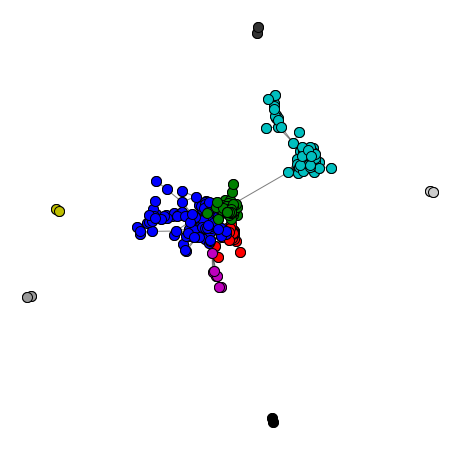

In [6]:
coms = []

for thre in [0.5]:
    print(thre)
    G = const_net(correlations, thre)
    print(G.number_of_nodes())
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    com = algorithms.greedy_modularity(G)
    viz.plot_network_clusters(G, com, node_size = 100 )
#     com = algorithms.node_perception(G, threshold=0.25, overlap_threshold=0.25)
    coms.append(com)


In [22]:
gene_taken_off_sequence = [41, 88, 95, 34, 81, 82, 65, 62, 100, 104, 115, 29, 113, 91, 37, 56, 116, 17, 18, 60, 102, 78, 122, 121, 73, 105, 50, 98, 45, 119, 92, 84, 14, 15, 130, 101, 128, 126, 125, 127, 51, 103, 124, 26, 59, 42, 77, 8, 6, 35, 111, 90, 19, 38, 97, 58, 112, 23, 55, 47, 72, 114, 89, 54, 106, 1, 117, 20, 25, 131, 9, 3, 108, 79, 43, 110, 86, 39, 5, 24, 52, 30, 109, 53, 10, 87, 27, 132, 67, 44, 94, 75, 49, 13, 76, 74, 40, 46, 63, 68, 123, 12, 31, 33, 71, 118, 93, 4, 80, 96, 83, 85, 129, 0, 16, 107, 99, 61, 70, 57, 64, 69, 7, 28, 2, 66, 36, 120, 21, 22,11,32,48]

sensitive_id_559_ref_list = list(pd.read_csv(filterd_data)['ID'])
sensitive_id_133_ref_list = list(pd.read_csv(filterd_133_data)['ID'])
top_34_gene_id_ref_list = [sensitive_id_133_ref_list[i] for i in gene_taken_off_sequence[-34:]]
top_13_gene_id_ref_list = [sensitive_id_133_ref_list[i] for i in gene_taken_off_sequence[-13:]]

# conmmunities_in_sensitive_id = []
for com in coms:
    clusters = com.to_node_community_map()
    conmmunities = []
    for i in range(100):
        conmmunities.append([])

    for i in clusters.keys():
        c = clusters[i]
        for j in c:
#             print(j)
            conmmunities[j].append(sensitive_id_559_ref_list[i])
    conmmunities = [ item for item in conmmunities if item != [] ]
    
#     conmmunities_in_sensitive_id.append(conmmunities)
    com_size = len(conmmunities)
    
    com_table = np.zeros((com_size,4))
    
    for i in range(com_size):
        com_table[i][0] = len(conmmunities[i])
        com_table[i][1] = len(list(set(conmmunities[i]) & set(sensitive_id_133_ref_list)))
        com_table[i][2] = len(list(set(conmmunities[i]) & set(top_34_gene_id_ref_list)))
        com_table[i][3] = len(list(set(conmmunities[i]) & set(top_13_gene_id_ref_list)))
        
        
    print("com_size",com_size)
    print('Community overlapping table')
    print(pd.DataFrame(com_table))
    print(np.sum(com_table,axis = 0))

com_size 10
Community overlapping table
       0     1     2    3
0  152.0  18.0   4.0  3.0
1  138.0  50.0  17.0  7.0
2  135.0  49.0  10.0  3.0
3   60.0   8.0   1.0  0.0
4    7.0   1.0   0.0  0.0
5    2.0   0.0   0.0  0.0
6    2.0   0.0   0.0  0.0
7    2.0   0.0   0.0  0.0
8    2.0   0.0   0.0  0.0
9    2.0   0.0   0.0  0.0
[502. 126.  32.  13.]


## correlation of all, LN, Bone, Liver 

In [42]:
all_df = pd.read_csv(filterd_data).drop(columns = ['ID'])
pt_np = np.array(df.T)
ln_np = pt_np[:117]
bone_np = pt_np[117:191]
liver_np = pt_np[191:]

ln_df = pd.DataFrame(ln_np.T)
bone_df = pd.DataFrame(bone_np.T)
liver_df = pd.DataFrame(liver_np.T)
liver_df

all_corre = np.corrcoef(all_df, all_df)[:559, :559]
ln_corre = np.corrcoef(ln_df, ln_df)[:559, :559]
bone_corre = np.corrcoef(bone_df, bone_df)[:559, :559]
liver_corre = np.corrcoef(liver_df, liver_df)[:559, :559]


corres = [all_corre, ln_corre, bone_corre, liver_corre]
flatten_corres = []
for each in corres:
    temp_corre = []
    for j in range(all_corre.shape[0]):
        for k in range(j+1, all_corre.shape[1]):
#             if each[j][k] < 0:
#                 temp_corre.append(-each[j][k])
#             else:
                temp_corre.append(each[j][k])
    flatten_corres.append(temp_corre)

corres_df = pd.DataFrame()
corres_df['all_corre'] = flatten_corres[0]
corres_df['ln_corre'] = flatten_corres[1]
corres_df['bone_corre'] = flatten_corres[2]
corres_df['liver_corre'] = flatten_corres[3]
corres_df = corres_df.sort_values(by=['all_corre'])
corres_df



,all_corre,ln_corre,bone_corre,liver_corre
41837,-0.526623,-0.573097,-0.599182,-0.262640
41562,-0.493716,-0.543040,-0.592328,-0.250526
41840,-0.474021,-0.506105,-0.570013,-0.242272
147712,-0.454125,-0.482174,-0.534330,-0.145509
125766,-0.445285,-0.399245,-0.428431,-0.415767
...,...,...,...,...
14726,0.993190,0.999751,0.992878,0.876839
50517,0.993568,0.908704,0.996587,0.944590
24122,0.994021,0.971203,0.985752,0.993645
1116,0.995605,0.526597,0.923407,0.995003


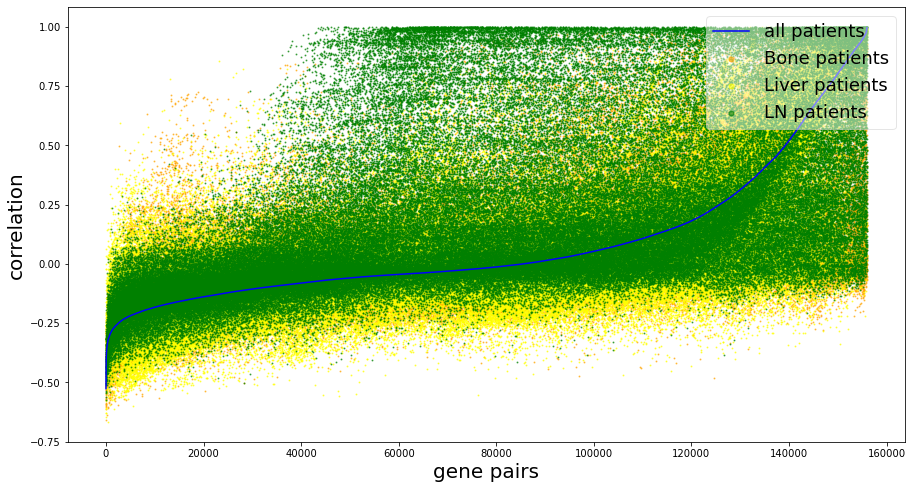

In [45]:
plt.figure(figsize=(15,8))
alpha = 0.6
plt.scatter(np.arange(155961), corres_df['bone_corre'] , color='orange', alpha=alpha,label='Bone patients',s=1)
plt.scatter(np.arange(155961), corres_df['liver_corre'] , color='yellow', alpha=alpha,label='Liver patients',s=1)
plt.scatter(np.arange(155961), corres_df['ln_corre'] , color='green', alpha=alpha,label='LN patients',s=1)
plt.plot(np.arange(155961), corres_df['all_corre'] , color='blue', label='all patients')

plt.legend(loc='upper right', markerscale=5, fontsize=18, framealpha=0.5)
plt.ylabel('correlation', fontsize=20)
plt.xlabel('gene pairs', fontsize=20)


# plt.grid(True, which='both')
# plt.axhline(y=0, color='k')
plt.show()

# Last week tasks

In [45]:
clinical_231_file = 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\clinical_231_data.csv'
mRNA_231_file = 'C:\\Users\\bird\\Desktop\\cancer_project_github\\cancer_data\\data_mRNA_231_sort_with_sensitive.csv'
id_symbol_lookup_file = 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\Hugo_Symbol_to_id.csv'
filterd_559_data = 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\filtered_559_genes_data.csv'
filterd_133_data = 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\filtered_133_genes_data.csv'

gene_559_pd = pd.read_csv(filterd_559_data)
# print(gene_559_pd)

gene_taken_off_sequence = [41, 88, 95, 34, 81, 82, 65, 62, 100, 104, 115, 29, 113, 91, 37, 56, 116, 17, 18, 60, 102, 78, 122, 121, 73, 105, 50, 98, 45, 119, 92, 84, 14, 15, 130, 101, 128, 126, 125, 127, 51, 103, 124, 26, 59, 42, 77, 8, 6, 35, 111, 90, 19, 38, 97, 58, 112, 23, 55, 47, 72, 114, 89, 54, 106, 1, 117, 20, 25, 131, 9, 3, 108, 79, 43, 110, 86, 39, 5, 24, 52, 30, 109, 53, 10, 87, 27, 132, 67, 44, 94, 75, 49, 13, 76, 74, 40, 46, 63, 68, 123, 12, 31, 33, 71, 118, 93, 4, 80, 96, 83, 85, 129, 0, 16, 107, 99, 61, 70, 57, 64, 69, 7, 28, 2, 66, 36, 120, 21, 22,11,32,48]

sensitive_id_559_ref_list = list(pd.read_csv(filterd_559_data)['ID'])
sensitive_id_133_ref_list = list(pd.read_csv(filterd_133_data)['ID'])
top_34_gene_id_ref_list = [sensitive_id_133_ref_list[i] for i in gene_taken_off_sequence[-34:]]
top_13_gene_id_ref_list = [sensitive_id_133_ref_list[i] for i in gene_taken_off_sequence[-13:]]

col_133 = len(sensitive_id_559_ref_list) * [0]
col_34 = len(sensitive_id_559_ref_list) * [0]
col_13 = len(sensitive_id_559_ref_list) * [0]

for i in range(len(sensitive_id_559_ref_list)):
    if sensitive_id_559_ref_list[i] in sensitive_id_133_ref_list:
        col_133[i] = 1
    if sensitive_id_559_ref_list[i] in top_34_gene_id_ref_list:
        col_34[i] = 1
    if sensitive_id_559_ref_list[i] in top_13_gene_id_ref_list:
        col_13[i] = 1

nodes_ref_tab = pd.DataFrame()
nodes_ref_tab['559'] = range(len(sensitive_id_559_ref_list))
nodes_ref_tab['133'] = col_133
nodes_ref_tab['34'] = col_34
nodes_ref_tab['13'] = col_13
nodes_ref_tab['sensitive_id'] = sensitive_id_559_ref_list
nodes_ref_tab

,559,133,34,13,sensitive_id
0,0,1,1,0,2
1,1,1,0,0,9
2,2,0,0,0,12
3,3,0,0,0,15
4,4,0,0,0,18
...,...,...,...,...,...
554,554,0,0,0,13874
555,555,0,0,0,13889
556,556,1,0,0,13940
557,557,0,0,0,14010


In [46]:
#code for gephi export network 
df = pd.read_csv(filterd_559_data).drop(columns = ['ID'])
correlations = np.corrcoef(df, df)[:559, :559]
threshold = 0.5
link_num = 0
cores = np.copy(correlations)

for i in range(cores.shape[0]):
    cores[i][i]=0
    
for i in range(cores.shape[0]):
    for j in range(cores.shape[0]):
        if cores[i][j] < threshold and cores[i][j]>-threshold:
            cores[i][j]  = 0
        else:
            link_num +=1
            cores[i][j]  = 1


In [47]:
i = 0
isol_nodes = []
for each_gene in cores:
    edges = list(each_gene).count(1)
    if edges == 0:
        isol_nodes.append(i)
    if edges == 1:
        ind = list(each_gene).index(1)
        if list(cores[ind]).count(1) == 1:
            isol_nodes.append(i)
    i+=1
print(len(isol_nodes))

67


In [48]:
nodes_ref_tab = nodes_ref_tab.drop(isol_nodes)
nodes_ref_tab['559'] = range(492)
nodes_ref_tab = nodes_ref_tab.reset_index(drop=True)
print(nodes_ref_tab)

     559  133  34  13  sensitive_id
0      0    1   1   0             2
1      1    1   0   0             9
2      2    0   0   0            12
3      3    0   0   0            15
4      4    0   0   0            18
..   ...  ...  ..  ..           ...
487  487    0   0   0         13874
488  488    0   0   0         13889
489  489    1   0   0         13940
490  490    0   0   0         14010
491  491    1   0   0         14119

[492 rows x 5 columns]


In [188]:

nodes_ref_tab.to_csv("C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\gene_492_ref_table.csv", index=False)

In [49]:
gene_492_pd = gene_559_pd.drop(isol_nodes).drop(columns = ['ID']).reset_index(drop=True)
gene_492_pd

,0,1,2,3,4,5,6,7,8,9,...,221,222,223,224,225,226,227,228,229,230
0,8.693,22.395,50.843,66.151,54.679,11564.212,43.055,394.181,22.921,1510.334,...,48.828,33.877,44.952,4.241,38.053,78.057,307.665,224.079,8.973,52.029
1,1.164,32.202,58.076,29.167,52.251,8333.306,18.559,101.457,15.704,449.229,...,16.234,14.736,26.046,1.728,9.462,18.612,84.385,112.152,0.574,10.074
2,0.000,9.185,0.000,0.000,0.574,0.198,0.752,1.472,0.024,0.012,...,2045.375,2228.348,8.543,1.777,0.042,1029.984,3687.453,1.309,316.562,313.478
3,0.000,0.000,0.000,0.000,0.418,0.313,0.402,1.026,0.000,0.000,...,1428.706,827.407,0.518,1.429,0.000,794.625,3494.664,0.424,320.829,67.233
4,0.000,3.939,0.000,0.000,0.425,0.186,0.263,0.791,0.000,0.000,...,1252.562,1466.622,0.501,1.939,0.030,744.268,2793.677,0.776,257.022,128.038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,0.018,0.013,0.000,0.051,0.000,0.032,0.000,0.000,0.064,0.113,...,0.084,0.062,0.010,0.000,0.000,0.064,0.348,0.009,0.402,0.369
488,0.024,0.000,0.000,0.854,0.000,0.268,0.000,0.000,0.008,0.007,...,0.218,0.068,0.051,0.263,0.030,0.227,0.256,0.012,0.043,0.267
489,0.016,0.044,0.032,1.883,0.007,0.000,0.000,0.022,0.000,0.008,...,0.046,0.000,0.013,0.008,0.000,0.030,0.000,0.000,0.012,0.110
490,0.000,0.000,0.000,0.152,0.008,0.000,0.000,0.008,0.018,0.009,...,0.008,0.007,0.008,0.009,0.000,0.012,0.000,0.014,0.000,0.000


# Gene net for all patient, and each cancer

In [81]:
#code for gephi export network 
df = gene_492_pd.copy()
correlations = np.corrcoef(df, df)[:492, :492]
threshold = 0.5
link_num = 0
cores = np.copy(correlations)

for i in range(cores.shape[0]):
    cores[i][i]=0
    
for i in range(cores.shape[0]):
    for j in range(cores.shape[0]):
        if cores[i][j] < threshold and cores[i][j]>-threshold:
            cores[i][j]  = 0
        else:
            link_num +=1
            cores[i][j]  = 1

print("Number of links: ", link_num/2)
print("Avg. Node Degree: ", link_num/231/2)

temp_df = pd.DataFrame(cores)
temp_df
temp_df.to_csv("C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\gene_all_net_matrix.csv")

Number of links:  16699.0
Avg. Node Degree:  72.29004329004329


(492, 117)
0.56
Node NO 432
avg. degree 118.91203703703704
432


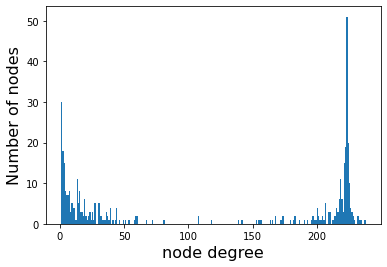

0.1147280692581486 [-0.24177427] 0.8024839865757561


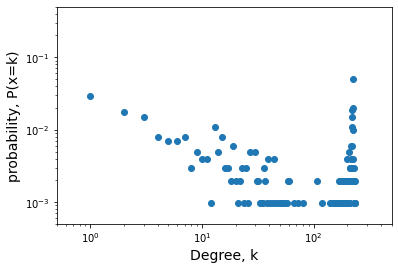

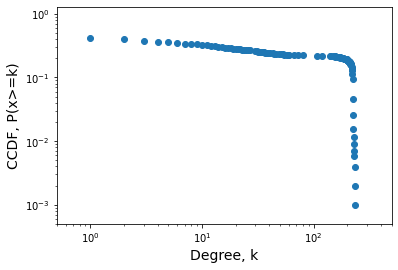

Number of links:  25685.0
Avg. Node Degree:  118.91203703703704


In [54]:
# code for preparaing gephi import data
# LN: threshold 0.24, modularity: 0.19
# Bone: threshold 0.62, modularity: 0.54
# Liver: threshold 0.54, modularity: 0.33

df = gene_492_pd.copy()

LN_df = df.drop(columns = map(str,  list(range(117, 231))))

print(LN_df.shape)
correlations = np.corrcoef(LN_df, LN_df)[:492, :492]

# Bone_df = df.drop(columns = map(str,  list(range(117)))).drop(columns = map(str,  list(range(191,231))))
# correlations = np.corrcoef(Bone_df, Bone_df)[:492, :492]

# Liver_df = df.drop(columns = map(str,  list(range(191))))
# correlations = np.corrcoef(Liver_df, Liver_df)[:492, :492]



threshold = 0.56
link_num = 0
cores = np.copy(correlations)

for thre in [threshold]:
    print(thre)
    G = const_net(correlations, thre)
    print(G.number_of_nodes())
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    dmax = max(degree_sequence)
    plot_degree_dist(G, dmax)
    
for i in range(cores.shape[0]):
    cores[i][i]=0
    
for i in range(cores.shape[0]):
    for j in range(cores.shape[0]):
        if cores[i][j] < threshold and cores[i][j]>-threshold:
            cores[i][j]  = 0
        else:
            link_num +=1
            cores[i][j]  = 1


print("Number of links: ", link_num/2)
print("Avg. Node Degree: ", link_num/432)

temp_df = pd.DataFrame(cores)
# temp_df
temp_df.to_csv("C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\gene_LN_net_matrix.csv")

In [79]:
# code for preparaing gephi import data
# LN: threshold 0.24, modularity: 0.19
# Bone: threshold 0.62, modularity: 0.54
# Liver: threshold 0.54, modularity: 0.33

df = gene_492_pd.copy()

Bone_df = df.drop(columns = map(str,  list(range(117)))).drop(columns = map(str,  list(range(191,231))))
correlations = np.corrcoef(Bone_df, Bone_df)[:492, :492]

threshold = 0.62
link_num = 0
cores = np.copy(correlations)

for i in range(cores.shape[0]):
    cores[i][i]=0
    
for i in range(cores.shape[0]):
    for j in range(cores.shape[0]):
        if cores[i][j] < threshold and cores[i][j]>-threshold:
            cores[i][j]  = 0
        else:
            link_num +=1
            cores[i][j]  = 1

temp_df = pd.DataFrame(cores)
temp_df.to_csv("C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\gene_Bone_net_matrix.csv")

In [80]:
# code for preparaing gephi import data
# LN: threshold 0.24, modularity: 0.19
# Bone: threshold 0.62, modularity: 0.54
# Liver: threshold 0.54, modularity: 0.33

df = gene_492_pd.copy()

Liver_df = df.drop(columns = map(str,  list(range(191))))
correlations = np.corrcoef(Liver_df, Liver_df)[:492, :492]

threshold = 0.54
link_num = 0
cores = np.copy(correlations)

for i in range(cores.shape[0]):
    cores[i][i]=0
    
for i in range(cores.shape[0]):
    for j in range(cores.shape[0]):
        if cores[i][j] < threshold and cores[i][j]>-threshold:
            cores[i][j]  = 0
        else:
            link_num +=1
            cores[i][j]  = 1

temp_df = pd.DataFrame(cores)
temp_df.to_csv("C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\gene_Liver_net_matrix.csv")

# Analysis and Process Gephi Net inforamtion csv data

In [199]:
a = [1,2,3,33,3,3,3,3,3,4,45,56,67]
# a.index(3)
[i for i in range(len(a)) if a[i] == 3]

[2, 4, 5, 6, 7, 8]

In [55]:
gene_all_inf = 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\gephi\\492_gene_all_inf.csv'
gene_ln_inf = 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\gephi\\492_gene_ln_inf.csv'
gene_bone_inf = 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\gephi\\492_gene_bone_inf.csv'
gene_liver_inf = 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\gephi\\492_gene_liver_inf.csv'
gene_492_ref_table = 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\gene_492_ref_table.csv'

nodes_ref_tab = pd.read_csv(gene_492_ref_table).reset_index(drop=True)

gene_all_inf_df = pd.read_csv(gene_all_inf).sort_values(by=['Id']).reset_index(drop=True)
gene_ln_inf_df = pd.read_csv(gene_ln_inf).sort_values(by=['Id']).reset_index(drop=True)
gene_bone_inf_df = pd.read_csv(gene_bone_inf).sort_values(by=['Id']).reset_index(drop=True)
gene_liver_inf_df = pd.read_csv(gene_liver_inf).sort_values(by=['Id']).reset_index(drop=True)

# print(gene_all_inf_df)
# print(gene_ln_inf_df)
# print(gene_bone_inf_df)
# print(gene_liver_inf_df)
# process all patient infor
# Check list: +node size
#             +other community

gene_all_inf_df['13_nodes_lable'] = ''
gene_ln_inf_df['13_nodes_lable'] = ''
gene_bone_inf_df['13_nodes_lable'] = ''
gene_liver_inf_df['13_nodes_lable'] = ''

gene_all_inf_df['node_size'] = ''
gene_ln_inf_df['node_size'] = ''
gene_bone_inf_df['node_size'] = ''
gene_liver_inf_df['node_size'] = ''

gene_all_inf_df['LN_class'] = ''
gene_all_inf_df['Bone_class'] = ''
gene_all_inf_df['Liver_class'] = ''

gene_ln_inf_df['All_class'] = ''
gene_ln_inf_df['Bone_class'] = ''
gene_ln_inf_df['Liver_class'] = ''

gene_bone_inf_df['All_class'] = ''
gene_bone_inf_df['LN_class'] = ''
gene_bone_inf_df['Liver_class'] = ''

gene_liver_inf_df['All_class'] = ''
gene_liver_inf_df['Bone_class'] = ''
gene_liver_inf_df['LN_class'] = ''

all_id_list = list(gene_all_inf_df['Id'])
ln_id_list = list(gene_ln_inf_df['Id'])
bone_id_list = list(gene_bone_inf_df['Id'])
liver_id_list = list(gene_liver_inf_df['Id'])

nodes_13_list = list(nodes_ref_tab['13'])
nodes_34_list = list(nodes_ref_tab['34'])
nodes_133_list = list(nodes_ref_tab['133'])

# all patients

nodes_13_inds = [i for i in range(len(nodes_13_list)) if nodes_13_list[i] == 1]

for i in range(len(gene_all_inf_df)):
    ind = all_id_list[i]
    
    
    if ind in nodes_13_inds:
        gene_all_inf_df.loc[gene_all_inf_df['Id'] == ind, '13_nodes_lable'] = nodes_13_inds.index(ind)
    
    if nodes_13_list[ind] ==1:
        gene_all_inf_df.loc[gene_all_inf_df['Id'] == ind, 'node_size'] = 4
    elif nodes_34_list[ind] ==1:
        gene_all_inf_df.loc[gene_all_inf_df['Id'] == ind, 'node_size'] = 3
    elif nodes_133_list[ind] ==1:
        gene_all_inf_df.loc[gene_all_inf_df['Id'] == ind, 'node_size'] = 2
    else:
        gene_all_inf_df.loc[gene_all_inf_df['Id'] == ind, 'node_size'] = 1
        
    
    
    if ind in ln_id_list:
        x = gene_ln_inf_df.loc[gene_ln_inf_df['Id'] == ind, 'modularity_class'].iloc[0]
        gene_all_inf_df.loc[gene_all_inf_df['Id'] == ind, 'LN_class'] = x
    else:
        gene_all_inf_df.loc[gene_all_inf_df['Id'] == ind, 'LN_class'] = -1
    
    if ind in bone_id_list:
        x = gene_bone_inf_df.loc[gene_bone_inf_df['Id'] == ind, 'modularity_class'].iloc[0]
        gene_all_inf_df.loc[gene_all_inf_df['Id'] == ind, 'Bone_class'] = x
    else:
        gene_all_inf_df.loc[gene_all_inf_df['Id'] == ind, 'Bone_class'] = -1
    
    if ind in liver_id_list:
        x = gene_liver_inf_df.loc[gene_liver_inf_df['Id'] == ind, 'modularity_class'].iloc[0]
        gene_all_inf_df.loc[gene_all_inf_df['Id'] == ind, 'Liver_class'] = x
    else:
        gene_all_inf_df.loc[gene_all_inf_df['Id'] == ind, 'Liver_class'] = -1

gene_all_inf_df.to_csv( 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\gephi\\492_gene_all_inf_processed.csv', index=False)
# LN patients:
for i in range(len(gene_ln_inf_df)):
    ind = ln_id_list[i]
    
    if ind in nodes_13_inds:
        gene_ln_inf_df.loc[gene_ln_inf_df['Id'] == ind, '13_nodes_lable'] = nodes_13_inds.index(ind)
        
    if nodes_13_list[ind] ==1:
        gene_ln_inf_df.loc[gene_ln_inf_df['Id'] == ind, 'node_size'] = 4
    elif nodes_34_list[ind] ==1:
        gene_ln_inf_df.loc[gene_ln_inf_df['Id'] == ind, 'node_size'] = 3
    elif nodes_133_list[ind] ==1:
        gene_ln_inf_df.loc[gene_ln_inf_df['Id'] == ind, 'node_size'] = 2
    else:
        gene_ln_inf_df.loc[gene_ln_inf_df['Id'] == ind, 'node_size'] = 1
        
    
    
    if ind in all_id_list:
        x = gene_all_inf_df.loc[gene_all_inf_df['Id'] == ind, 'modularity_class'].iloc[0]
        gene_ln_inf_df.loc[gene_ln_inf_df['Id'] == ind, 'All_class'] = x
    else:
        gene_ln_inf_df.loc[gene_ln_inf_df['Id'] == ind, 'All_class'] = -1
    
    if ind in bone_id_list:
        x = gene_bone_inf_df.loc[gene_bone_inf_df['Id'] == ind, 'modularity_class'].iloc[0]
        gene_ln_inf_df.loc[gene_ln_inf_df['Id'] == ind, 'Bone_class'] = x
    else:
        gene_ln_inf_df.loc[gene_ln_inf_df['Id'] == ind, 'Bone_class'] = -1
    
    if ind in liver_id_list:
        x = gene_liver_inf_df.loc[gene_liver_inf_df['Id'] == ind, 'modularity_class'].iloc[0]
        gene_ln_inf_df.loc[gene_ln_inf_df['Id'] == ind, 'Liver_class'] = x
    else:
        gene_ln_inf_df.loc[gene_ln_inf_df['Id'] == ind, 'Liver_class'] = -1

gene_ln_inf_df.to_csv( 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\gephi\\492_gene_ln_inf_processed.csv', index=False)    


# Bone patients
for i in range(len(gene_bone_inf_df)):
    ind = bone_id_list[i]
    
    if ind in nodes_13_inds:
        gene_bone_inf_df.loc[gene_bone_inf_df['Id'] == ind, '13_nodes_lable'] = nodes_13_inds.index(ind)
        
    if nodes_13_list[ind] ==1:
        gene_bone_inf_df.loc[gene_bone_inf_df['Id'] == ind, 'node_size'] = 4
    elif nodes_34_list[ind] ==1:
        gene_bone_inf_df.loc[gene_bone_inf_df['Id'] == ind, 'node_size'] = 3
    elif nodes_133_list[ind] ==1:
        gene_bone_inf_df.loc[gene_bone_inf_df['Id'] == ind, 'node_size'] = 2
    else:
        gene_bone_inf_df.loc[gene_bone_inf_df['Id'] == ind, 'node_size'] = 1
        
    
    
    if ind in all_id_list:
        x = gene_all_inf_df.loc[gene_all_inf_df['Id'] == ind, 'modularity_class'].iloc[0]
        gene_bone_inf_df.loc[gene_bone_inf_df['Id'] == ind, 'All_class'] = x
    else:
        gene_bone_inf_df.loc[gene_bone_inf_df['Id'] == ind, 'All_class'] = -1
        
    if ind in ln_id_list:
        x = gene_ln_inf_df.loc[gene_ln_inf_df['Id'] == ind, 'modularity_class'].iloc[0]
        gene_bone_inf_df.loc[gene_bone_inf_df['Id'] == ind, 'LN_class'] = x
    else:
        gene_bone_inf_df.loc[gene_bone_inf_df['Id'] == ind, 'LN_class'] = -1
    
    if ind in liver_id_list:
        x = gene_liver_inf_df.loc[gene_liver_inf_df['Id'] == ind, 'modularity_class'].iloc[0]
        gene_bone_inf_df.loc[gene_bone_inf_df['Id'] == ind, 'Liver_class'] = x
    else:
        gene_bone_inf_df.loc[gene_bone_inf_df['Id'] == ind, 'Liver_class'] = -1
gene_bone_inf_df.to_csv( 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\gephi\\492_gene_bone_inf_processed.csv', index=False)    

# liver patients
for i in range(len(gene_liver_inf_df)):
    ind = liver_id_list[i]
    
    if ind in nodes_13_inds:
        gene_liver_inf_df.loc[gene_liver_inf_df['Id'] == ind, '13_nodes_lable'] = nodes_13_inds.index(ind)
        
    if nodes_13_list[ind] ==1:
        gene_liver_inf_df.loc[gene_liver_inf_df['Id'] == ind, 'node_size'] = 4
    elif nodes_34_list[ind] ==1:
        gene_liver_inf_df.loc[gene_liver_inf_df['Id'] == ind, 'node_size'] = 3
    elif nodes_133_list[ind] ==1:
        gene_liver_inf_df.loc[gene_liver_inf_df['Id'] == ind, 'node_size'] = 2
    else:
        gene_liver_inf_df.loc[gene_liver_inf_df['Id'] == ind, 'node_size'] = 1
        
        
    
    if ind in all_id_list:
        x = gene_all_inf_df.loc[gene_all_inf_df['Id'] == ind, 'modularity_class'].iloc[0]
        gene_liver_inf_df.loc[gene_liver_inf_df['Id'] == ind, 'All_class'] = x
    else:
        gene_liver_inf_df.loc[gene_liver_inf_df['Id'] == ind, 'All_class'] = -1
    
    if ind in ln_id_list:
        x = gene_ln_inf_df.loc[gene_ln_inf_df['Id'] == ind, 'modularity_class'].iloc[0]
        gene_liver_inf_df.loc[gene_liver_inf_df['Id'] == ind, 'LN_class'] = x
    else:
        gene_liver_inf_df.loc[gene_liver_inf_df['Id'] == ind, 'LN_class'] = -1
    
    if ind in bone_id_list:
        x = gene_bone_inf_df.loc[gene_bone_inf_df['Id'] == ind, 'modularity_class'].iloc[0]
        gene_liver_inf_df.loc[gene_liver_inf_df['Id'] == ind, 'Bone_class'] = x
    else:
        gene_liver_inf_df.loc[gene_liver_inf_df['Id'] == ind, 'Bone_class'] = -1
        
gene_liver_inf_df.to_csv( 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\gephi\\492_gene_liver_inf_processed.csv', index=False)    


# gene_all_inf_df.to_csv( 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\gephi\\492_gene_all_inf_processed.csv', index=False)

In [200]:

# gene_all_inf_df['13_nodes_lable'] = ''
    
[i for i in range(len(nodes_13_list)) if nodes_13_list[i] == 1]

[18, 35, 45, 101, 105, 123, 135, 154, 195, 262, 268, 294, 453]

In [150]:


# process all patient infor
for i in range(len(gene_ln_inf_df)):
    pass
print(len(gene_ln_inf_df))
gene_ln_inf_df['All_class'] = ''
gene_ln_inf_df.loc[gene_ln_inf_df['Id'] == 490, 'All_class'] = 10
gene_ln_inf_df

# gene_all_inf_df.loc[gene_all_inf_df['Id'] == 3, 'modularity_class']



# gene_all_inf_df.to_csv( 'C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\gephi\\492_gene_all_inf_processed.csv', index=False)





408


,Id,Label,timeset,modularity_class,node_size,All_class,Bone_class,Liver_class
0,0,0,NaN,0,,,,
1,1,1,NaN,0,,,,
2,2,2,NaN,5,,,,
3,3,3,NaN,0,,,,
4,4,4,NaN,1,,,,
...,...,...,...,...,...,...,...,...
403,487,487,NaN,0,,,,
404,488,488,NaN,0,,,,
405,489,489,NaN,13,,,,
406,490,490,NaN,0,,10,,


# Overlapping community detection


In [202]:
LN_net_matrix_path = "C:\\Users\\bird\Desktop\\cancer_project_github\\cancer_data\\gephi\\gene_All_net_matrix.csv"


LN_net_matrix = pd.read_csv(LN_net_matrix_path, index_col=[0])
print(LN_net_matrix)
LN_net_matrix_array = np.array(LN_net_matrix)

       0    1    2    3    4    5    6    7    8    9  ...  482  483  484  \
0    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  0.0   
1    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
2    0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  ...  0.0  1.0  0.0   
3    0.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  ...  0.0  1.0  0.0   
4    0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  ...  0.0  1.0  0.0   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
487  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0   
488  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0  0.0   
489  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
490  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
491  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   

     485  486  487  488  489  490  491  
0    0.0  1.0  0.0  0.0  0.0  0.0 

In [203]:
i=0
isol_nodes = []
for each_gene in LN_net_matrix_array:
    edges = list(each_gene).count(1)
    if edges == 0:
        isol_nodes.append(i)
    if edges == 1:
        ind = list(each_gene).index(1)
        if list(LN_net_matrix_array[ind]).count(1) == 1:
            isol_nodes.append(i)
    i+=1
print(isol_nodes)



G = nx.Graph()
G.add_nodes_from(np.arange(LN_net_matrix_array.shape[0]))
edge_list = []
for i in range(LN_net_matrix_array.shape[0]):
     for j in range(i+1, LN_net_matrix_array.shape[0]):
            if LN_net_matrix_array[i][j] == 1:
                edge_list.append((i,j))

print(len(edge_list))
G.add_edges_from(edge_list)
# print(list(nx.isolates(G)))
# G.remove_nodes_from(list(nx.isolates(G)))

G.remove_nodes_from(isol_nodes)
print(G.number_of_nodes(), G.number_of_edges())



[]
16699
492 16699


In [204]:
# com = algorithms.demon(G, min_com_size=5, epsilon=0.25)
# com = algorithms.node_perception(G, threshold=0.5, overlap_threshold=0.5)
com = algorithms.lais2(G)
m = com.link_modularity()
print(m)

FitnessResult(min=None, max=None, score=0.13161280084777535, std=None)


In [205]:
m = com.link_modularity()
print(m)
clusters = com.to_node_community_map()
conmmunities = []
for i in range(1000):
    conmmunities.append([])


for i in clusters.keys():
    c = clusters[i]
    for j in c:
        conmmunities[j].append(i)
conmmunities = [x for x in conmmunities if x != []]

print(len(conmmunities))


for each_com in conmmunities:
    print(len(each_com))

FitnessResult(min=None, max=None, score=0.13161280084777535, std=None)
24
142
111
38
31
20
19
18
18
17
16
16
16
16
15
13
13
7
7
7
7
6
5
5
3


In [206]:
all_eles = []
for i in range((len(conmmunities))):
    all_eles+=conmmunities[i]
print(len(all_eles))

v= np.unique(all_eles)
len(v)

566


397

In [213]:
for i in range(len(conmmunities)):
    com1 = conmmunities[i]
    tp = []
    for j in range(i, len(conmmunities)):
        com2 = conmmunities[j]
        l = len(np.intersect1d(com1,com2))
        tp.append(l)
    print(tp)

[142, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[111, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[38, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[31, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[20, 0, 18, 16, 16, 15, 0, 16, 15, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[19, 0, 0, 0, 0, 0, 0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[18, 14, 16, 15, 0, 14, 15, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[18, 15, 14, 0, 16, 15, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[17, 16, 0, 14, 16, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[16, 0, 13, 15, 15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[16, 0, 0, 0, 0, 13, 0, 6, 0, 0, 0, 0, 0, 0]
[16, 14, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[16, 14, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[15, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[13, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[13, 0, 3, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0]
[7, 0, 6, 5, 0, 0]
[7, 0, 0, 5, 0]
[6, 5, 0, 0]
[5, 0, 0]
[5, 0]
[3]


21


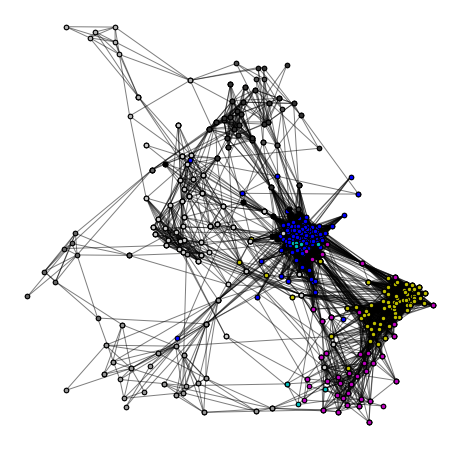

In [187]:
# print(len(np.intersect1d(conmmunities[0],conmmunities[2])))
viz.plot_network_clusters(G, com, node_size = 20 )